Installation

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 47kB/s 


In [ ]:
pip install keras

In [ ]:
pip install tensorflow

Importing the Libraries

In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Re-Sizing the image files

In [ ]:
IMAGE_SIZE = [224,224]

train_path = '/content/drive/My Drive/Pneumonia detection/chest_xray/train'
test_path = '/content/drive/My Drive/Pneumonia detection/chest_xray/test'

Preprocessing VGG 16 Layers using imagenet

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layers in vgg.layers:
  layers.trainable = False

In [ ]:
#for getting number of output class

folders = glob('/content/drive/My Drive/Pneumonia detection/chest_xray/train/*')

In [ ]:
#flattening layers

x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating a model object
model = Model(inputs=vgg.input, outputs=prediction)

Showing structure of the model

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

Optimization methods to be used

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Importing Image files

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical'
                                               )


Found 5234 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory( test_path,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical'
                                            )


Found 628 images belonging to 2 classes.


**Executing Model**

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
164/164 [==============================] - 3203s 20s/step - loss: 0.1874 - accuracy: 0.9236 - val_loss: 0.3999 - val_accuracy: 0.8742
Epoch 2/5
164/164 [==============================] - 3014s 18s/step - loss: 0.1203 - accuracy: 0.9562 - val_loss: 0.2834 - val_accuracy: 0.9124
Epoch 3/5
164/164 [==============================] - 3027s 18s/step - loss: 0.0846 - accuracy: 0.9681 - val_loss: 0.3108 - val_accuracy: 0.9045
Epoch 4/5
164/164 [==============================] - 3014s 18s/step - loss: 0.0821 - accuracy: 0.9668 - val_loss: 0.2267 - val_accuracy: 0.9204
Epoch 5/5
164/164 [==============================] - 3015s 18s/step - loss: 0.0976 - accuracy: 0.9648 - val_loss: 0.2756 - val_accuracy: 0.9108


**RESULT VISUALISATION**

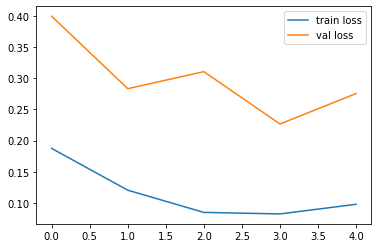

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


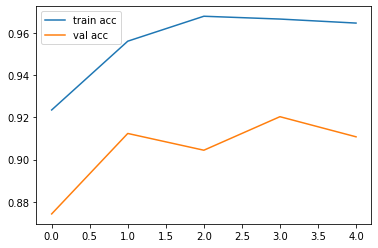

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**CONCLUSION:**

This model udergoes different convolutional layers and maxpooling layers as a result I got a decent amount of accuracy while testing the data.

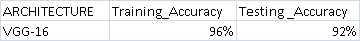